In [45]:
import os
import sys
import datetime
import shutil
import pickle
import json
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 시각화 관련 패키지
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

# # 음성 데이터 처리를 위한 패키지
# import librosa

# 자연어 데이터 처리를 위한 패키지
import konlpy
import nltk
from konlpy.tag import Okt, Komoran, Kkma
from nltk.tokenize import sent_tokenize

# Data Load

In [3]:
data_path = r'D:\Study\Lecture\Text_Analysis_Basic\Data'

train_path = os.path.join(data_path, 'ratings_train.txt')
test_path = os.path.join(data_path, 'ratings_test.txt') # valid set

In [4]:
def read_data(file_name):
    with open(file_name, 'r', encoding = 'utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    
    return data

train_data = pd.DataFrame(read_data(train_path))
test_data = pd.DataFrame(read_data(test_path))

In [5]:
display(train_data.head())
display(test_data.head())

,0,1,2
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


,0,1,2
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


# Data Preprocess

### Usage of Okt

In [2]:
okt = Okt()

In [29]:
okt.pos(train_data[1][0], norm = True, stem = True, join = True)

['아/Exclamation',
 '더빙/Noun',
 '../Punctuation',
 '진짜/Noun',
 '짜증나다/Adjective',
 '목소리/Noun']

In [27]:
okt.morphs(train_data[1][0], norm = True, stem = True)

['아', '더빙', '..', '진짜', '짜증나다', '목소리']

In [25]:
okt.pos('안녕하세욯ㅎㅎㅎ', norm = True, stem = True)

[('안녕하다', 'Adjective'), ('ㅎㅎㅎ', 'KoreanParticle')]

In [32]:
def tokenize(input_text):
    return okt.morphs(input_text, norm = True, stem = True)

In [49]:
train_df = pd.read_pickle(os.path.join(data_path, 'train_df.pickle'))

In [52]:
train_docs = [(train_df.iloc[i][1], train_df.iloc[i][2]) for i in range(len(train_df))]

In [55]:
tokens = [t for d in train_docs for t in d[0]]

In [61]:
text = nltk.Text(tokens, name = 'NMSC')

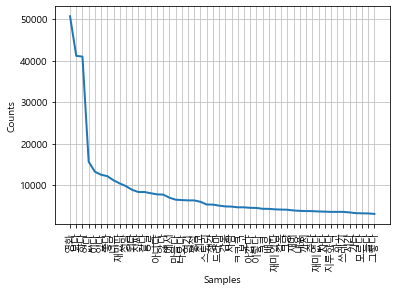

In [63]:
text.plot(50)